### Exercice:

Scraping weather forecase from the The Weather Channel website `weather.com` using `requests` and `BeautifulSoup` libraries.

1. Implement a scraping script for getting 10 days weather forecasts of Benguerir city and Tanger City.
2. Store the data sets into Pandas DataFrame.
3. Use matplotlib library to plot the raining days of the two cities in the same figure.  


<!DOCTYPE html>
<html dir="ltr" lang="en-US">
 <head>
  <meta charset="utf-8" data-react-helmet="true"/>
  <meta content="width=device-width, initial-scale=1, viewport-fit=cover" data-react-helmet="true" name="viewport"/>
  <meta content="max-image-preview:large" data-react-helmet="true" name="robots"/>
  <meta content="index, follow" data-react-helmet="true" name="robots"/>
  <meta content="origin" data-react-helmet="true" name="referrer"/>
  <meta content="Be prepared with the most accurate 10-day forecast for Ben Guerir, Marrakesh-Safi, Morocco with highs, lows, chance of precipitation from The Weather Channel and Weather.com" data-react-helmet="true" name="description"/>
  <meta content="#ffffff" data-react-helmet="true" name="msapplication-TileColor"/>
  <meta content="/daily/assets/ms-icon-144x144.d353af.png" data-react-helmet="true" name="msapplication-TileImage"/>
  <meta content="#ffffff" data-react-helmet="true" name="theme-color"/>
  <meta content="app-id=295646461" data-rea
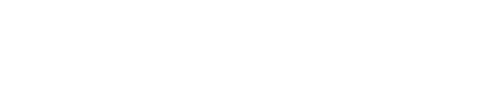
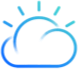

In [1]:
import requests
from bs4 import BeautifulSoup

#url of Benguerir 10 day weather 
page = requests.get("https://weather.com/weather/tenday/l/f37580e42d804f6d54467e56dd9f296e15fe9a25db53ddee63601416ecc06111")
# create an instance of the BeautifulSoup class to parse our document
soup = BeautifulSoup(page.content, 'html.parser')
#print out the HTML content of the page
print(soup.prettify())

In [2]:
highTemp = soup.find_all(attrs={"class" : "DetailsSummary--highTempValue--3PjlX"})
lowTemp = soup.find_all(attrs={"class" : "DetailsSummary--lowTempValue--2tesQ"})

In [3]:
#Function to transform fahrenheit to celsius 
def celsius(x):
    l = []
    for i in range(1,len(x)):
        l.append(round((int(x[i].string[:-1])-32)/1.8,0))
    return l

In [4]:
high = celsius(highTemp)[0:10]
low = celsius(lowTemp)[0:10]

In [5]:
date = soup.find_all(attrs={"class" : "DetailsSummary--daypartName--kbngc"})
dates = []
for i in range(1,11):
    dates.append(date[i].string[0:])
dates

['Tue 03',
 'Wed 04',
 'Thu 05',
 'Fri 06',
 'Sat 07',
 'Sun 08',
 'Mon 09',
 'Tue 10',
 'Wed 11',
 'Thu 12']

In [6]:
Rain = soup.find_all(attrs={"data-testid" : "Precip"})
S = BeautifulSoup("\n".join([str(x) for x in Rain]
                           ), 'html.parser')
Rain = S.find_all(attrs={"data-testid" : "PercentageValue"})
Rains = []
for i in range(1, 11):
    Rains.append(int(Rain[i].string[:-1]))
Rains

[10, 14, 12, 14, 14, 24, 12, 12, 6, 5]

In [7]:
import pandas as pd
Benguerir = pd.DataFrame({"Days":dates, "High temperature (Celsius)":high,"Low temperature (Celsius)":low,
                   "Rain Percentage": Rains})
Benguerir

,Days,High temperature (Celsius),Low temperature (Celsius),Rain Percentage
0,Tue 03,21.0,6.0,10
1,Wed 04,21.0,6.0,14
2,Thu 05,22.0,6.0,12
3,Fri 06,21.0,7.0,14
4,Sat 07,20.0,6.0,14
5,Sun 08,20.0,7.0,24
6,Mon 09,21.0,6.0,12
7,Tue 10,22.0,7.0,12
8,Wed 11,22.0,7.0,6
9,Thu 12,22.0,6.0,5


In [8]:
#url of Tangier 10 day weather 
page = requests.get("https://weather.com/weather/tenday/l/701d5f2dd2a2b8cabcc505d69649a291257de6c1369a982396ea546ccb99198c")
# create an instance of the BeautifulSoup class to parse our document
soup = BeautifulSoup(page.content, 'html.parser')
highTemp = soup.find_all(attrs={"class" : "DetailsSummary--highTempValue--3PjlX"})
lowTemp = soup.find_all(attrs={"class" : "DetailsSummary--lowTempValue--2tesQ"})
hight = celsius(highTemp)[0:10]
lowt = celsius(lowTemp)[0:10]
date = soup.find_all(attrs={"class" : "DetailsSummary--daypartName--kbngc"})
dates = []
for i in range(1,11):
    dates.append(date[i].string[0:])
dates
Rain = soup.find_all(attrs={"data-testid" : "Precip"})
S = BeautifulSoup("\n".join([str(x) for x in Rain]
                           ), 'html.parser')
Rain = S.find_all(attrs={"data-testid" : "PercentageValue"})
Rainst = []
for i in range(1, 11):
    Rainst.append(int(Rain[i].string[:-1]))
Rainst

[14, 12, 8, 12, 54, 80, 70, 45, 24, 14]

In [9]:
import pandas as pd
Tangier = pd.DataFrame({"Days":dates,"High temperature (Celsius)":hight,"Low temperature (Celsius)":lowt,
                   "Rain Percentage": Rainst})

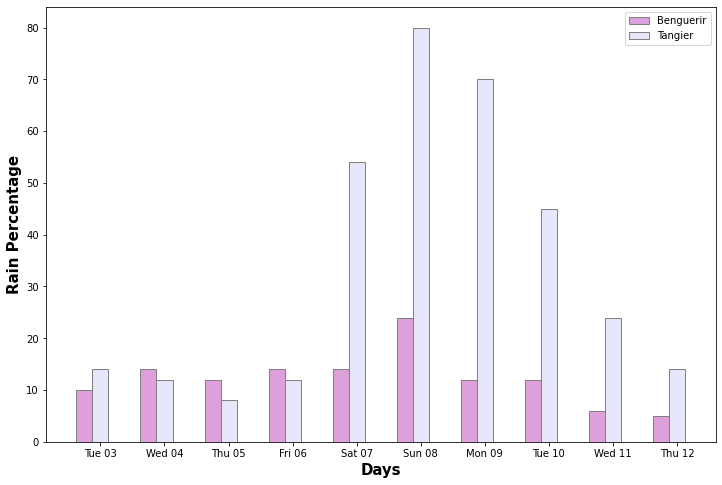

In [10]:
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
 
# set height of bar
bg = list(Benguerir["Rain Percentage"])
tg = list(Tangier["Rain Percentage"])

# Set position of bar on X axis
br1 = np.arange(len(bg))
br2 = [x + barWidth for x in br1]
 
# Make the plot
plt.bar(br1, bg, color ='plum', width = barWidth,
        edgecolor ='grey', label ='Benguerir')
plt.bar(br2, tg, color ='lavender', width = barWidth,
        edgecolor ='grey', label ='Tangier')
 
# Adding Xticks
plt.xlabel('Days', fontweight ='bold', fontsize = 15)
plt.ylabel('Rain Percentage', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(bg))],
        list(Tangier["Days"]))
 
plt.legend()
plt.show()